# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. 
Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.



<b>Цель проекта:</b> 
- Построить модель для определения региона, где добыча принесёт наибольшую прибыль. 

<b>Задача проекта:</b> 
- Проанализировать возможную прибыль и риски.

<b>Описание данных:</b>

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек;

<a id='Цель'></a>

## Загрузка и подготовка данных

In [ ]:
import pandas as pd
import seaborn as sns
import  numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [ ]:
RANDOM_STATE = 20052020
BUDGET = 1e+07 #Мы расчитываем прибыль в тысячах рублей за тысячу барелей, поэтому 1 милиард сохранен таким образом
CHOSEN_POINTS = 500
BEST_POINTS = 200

# цена за 1000 баррелей сырья
PRICE_PER_BARREL = 450
# доверительный интервал 
CONF_INTERVAL = 0.95
# максимальная вероятность убытков
MAX_LOSS = 0.025

In [ ]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
print(geo_data_0)
geo_data_0.info()

          id        f0        f1        f2     product
0      txEyH  0.705745 -0.497823  1.221170  105.280062
1      2acmU  1.334711 -0.340164  4.365080   73.037750
2      409Wp  1.022732  0.151990  1.419926   85.265647
3      iJLyR -0.032172  0.139033  2.978566  168.620776
4      Xdl7t  1.988431  0.155413  4.751769  154.036647
...      ...       ...       ...       ...         ...
99995  DLsed  0.971957  0.370953  6.075346  110.744026
99996  QKivN  1.392429 -0.382606  1.273912  122.346843
99997  3rnvd  1.029585  0.018787 -1.348308   64.375443
99998  7kl59  0.998163 -0.528582  1.583869   74.040764
99999  1CWhH  1.764754 -0.266417  5.722849  149.633246

[100000 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2  

In [ ]:
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
print(geo_data_1)
geo_data_1.info()

          id         f0         f1        f2     product
0      kBEdx -15.001348  -8.276000 -0.005876    3.179103
1      62mP7  14.272088  -3.475083  0.999183   26.953261
2      vyE1P   6.263187  -5.948386  5.001160  134.766305
3      KcrkZ -13.081196 -11.506057  4.999415  137.945408
4      AHL4O  12.702195  -8.147433  5.004363  134.766305
...      ...        ...        ...       ...         ...
99995  QywKC   9.535637  -6.878139  1.998296   53.906522
99996  ptvty -10.160631 -12.558096  5.005581  137.945408
99997  09gWa  -7.378891  -3.084104  4.998651  137.945408
99998  rqwUm   0.665714  -6.152593  1.000146   30.132364
99999  relB0  -3.426139  -7.794274 -0.003299    3.179103

[100000 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non

In [ ]:
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
print(geo_data_2)
geo_data_2.info()

          id        f0        f1        f2     product
0      fwXo0 -1.146987  0.963328 -0.828965   27.758673
1      WJtFt  0.262778  0.269839 -2.530187   56.069697
2      ovLUW  0.194587  0.289035 -5.586433   62.871910
3      q6cA6  2.236060 -0.553760  0.930038  114.572842
4      WPMUX -0.515993  1.716266  5.899011  149.600746
...      ...       ...       ...       ...         ...
99995  4GxBu -1.777037  1.125220  6.263374  172.327046
99996  YKFjq -1.261523 -0.894828  2.524545  138.748846
99997  tKPY3 -1.199934 -2.957637  5.219411  157.080080
99998  nmxp2 -2.419896  2.417221 -5.548444   51.795253
99999  V9kWn -2.551421 -2.025625  6.090891  102.775767

[100000 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2  

In [ ]:
def all_columns(data):
    for column in data.columns:
        print('Значения столбца:',column)
        print(data[column].value_counts(sort=False))
        print(data[column].isna().sum())

In [ ]:
all_columns(geo_data_0)

Значения столбца: id
fuRo2    1
1XkJa    1
uj5be    1
xEbTI    1
7ingc    1
        ..
lLaKD    1
YLqs5    1
x3h8H    1
hmVVj    1
CtNDK    1
Name: id, Length: 99990, dtype: int64
0
Значения столбца: f0
-1.218900    1
 0.525548    1
 0.866862    1
 1.117919    1
 0.095273    1
            ..
-1.103398    1
-0.883459    1
 0.026910    1
-0.671293    1
 1.751793    1
Name: f0, Length: 100000, dtype: int64
0
Значения столбца: f1
 0.296390    1
-0.116367    1
 0.883576    1
 0.458262    1
-0.373818    1
            ..
 0.037648    1
 0.927519    1
-0.421482    1
 0.356963    1
 1.010051    1
Name: f1, Length: 100000, dtype: int64
0
Значения столбца: f2
 4.623968    1
-5.438327    1
-2.367265    1
 2.383399    1
 3.722145    1
            ..
 7.784803    1
 1.456061    1
 5.500312    1
 0.365033    1
 4.001244    1
Name: f2, Length: 100000, dtype: int64
0
Значения столбца: product
0.000000      1
133.723699    1
129.517599    1
24.992933     1
136.765364    1
             ..
39.201231     1

In [ ]:
all_columns(geo_data_1)

Значения столбца: id
548tX    1
0oWtM    1
s3yYQ    1
FfCLe    1
IwIp6    1
        ..
BUhlI    1
9LaDf    1
sdOAU    1
pCTh8    1
VEbg2    1
Name: id, Length: 99996, dtype: int64
0
Значения столбца: f0
 9.471578     1
-8.395493     1
 4.533891     1
-4.839293     1
 11.700646    1
             ..
 12.479367    1
 15.524717    1
 12.405683    1
-7.530917     1
 2.442558     1
Name: f0, Length: 100000, dtype: int64
0
Значения столбца: f1
-7.148426     1
-6.666191     1
-10.583532    1
-3.942526     1
-15.817087    1
             ..
 4.681453     1
-7.187354     1
-12.323437    1
 1.040570     1
-0.688613     1
Name: f1, Length: 100000, dtype: int64
0
Значения столбца: f2
3.996243    1
2.005584    1
0.999501    1
1.002244    1
1.999583    1
           ..
2.998464    1
0.994707    1
3.995093    1
3.004506    1
4.992682    1
Name: f2, Length: 100000, dtype: int64
0
Значения столбца: product
0.000000      8235
53.906522     8472
107.813044    8201
110.992147    8303
84.038886     8431
80.85

In [ ]:
all_columns(geo_data_2)

Значения столбца: id
egEMm    1
a8VaR    1
g4wvt    1
eeXop    1
tWfU8    1
        ..
DRzUA    1
HBzwX    1
ShTCf    1
wPMew    1
Gogu2    1
Name: id, Length: 99996, dtype: int64
0
Значения столбца: f0
 1.936057    1
 0.432748    1
-1.746265    1
-1.958230    1
-1.414499    1
            ..
 0.264160    1
 2.269780    1
 0.090251    1
 0.093830    1
-0.107381    1
Name: f0, Length: 100000, dtype: int64
0
Значения столбца: f1
-0.424195    1
 0.846164    1
-2.271138    1
 2.347509    1
-0.124269    1
            ..
 2.502378    1
-0.178990    1
 0.474891    1
 1.341191    1
 1.717903    1
Name: f1, Length: 100000, dtype: int64
0
Значения столбца: f2
 1.553554    1
-2.331369    1
 1.519549    1
 5.327140    1
 7.258969    1
            ..
 5.130376    1
 8.128532    1
 6.997860    1
 5.795279    1
 0.206914    1
Name: f2, Length: 100000, dtype: int64
0
Значения столбца: product
0.000000      1
152.975437    1
8.738391      1
97.388861     1
28.528816     1
             ..
127.745337    1

<div class="alert alert-info">
<b>👆 О таблицах : </b> 
<br> * Пропусков не было выявлено.
<br>  * Удалим столбец id, для реализации поставленной задачи он не понадобится.

    
</div>

In [ ]:
def columns(data):
    for column in data.columns:
        print('Значения столбца:',column)
        print(data[column].duplicated().sum())

In [ ]:
columns(geo_data_0)

Значения столбца: id
10
Значения столбца: f0
0
Значения столбца: f1
0
Значения столбца: f2
0
Значения столбца: product
0


In [ ]:
columns(geo_data_1)

Значения столбца: id
4
Значения столбца: f0
0
Значения столбца: f1
0
Значения столбца: f2
0
Значения столбца: product
99988


In [ ]:
columns(geo_data_2)

Значения столбца: id
4
Значения столбца: f0
0
Значения столбца: f1
0
Значения столбца: f2
0
Значения столбца: product
0


In [ ]:
def col(data):
    for column in data.columns:
        print('Значения столбца:',column)
        print(data[column].drop_duplicates().reset_index(drop=True))
        print(data[column].duplicated().sum())

In [ ]:
col(geo_data_0)

Значения столбца: id
0        txEyH
1        2acmU
2        409Wp
3        iJLyR
4        Xdl7t
         ...  
99985    DLsed
99986    QKivN
99987    3rnvd
99988    7kl59
99989    1CWhH
Name: id, Length: 99990, dtype: object
10
Значения столбца: f0
0        0.705745
1        1.334711
2        1.022732
3       -0.032172
4        1.988431
           ...   
99995    0.971957
99996    1.392429
99997    1.029585
99998    0.998163
99999    1.764754
Name: f0, Length: 100000, dtype: float64
0
Значения столбца: f1
0       -0.497823
1       -0.340164
2        0.151990
3        0.139033
4        0.155413
           ...   
99995    0.370953
99996   -0.382606
99997    0.018787
99998   -0.528582
99999   -0.266417
Name: f1, Length: 100000, dtype: float64
0
Значения столбца: f2
0        1.221170
1        4.365080
2        1.419926
3        2.978566
4        4.751769
           ...   
99995    6.075346
99996    1.273912
99997   -1.348308
99998    1.583869
99999    5.722849
Name: f2, Length: 100000, dty

In [ ]:
col(geo_data_1)

Значения столбца: id
0        kBEdx
1        62mP7
2        vyE1P
3        KcrkZ
4        AHL4O
         ...  
99991    QywKC
99992    ptvty
99993    09gWa
99994    rqwUm
99995    relB0
Name: id, Length: 99996, dtype: object
4
Значения столбца: f0
0       -15.001348
1        14.272088
2         6.263187
3       -13.081196
4        12.702195
           ...    
99995     9.535637
99996   -10.160631
99997    -7.378891
99998     0.665714
99999    -3.426139
Name: f0, Length: 100000, dtype: float64
0
Значения столбца: f1
0        -8.276000
1        -3.475083
2        -5.948386
3       -11.506057
4        -8.147433
           ...    
99995    -6.878139
99996   -12.558096
99997    -3.084104
99998    -6.152593
99999    -7.794274
Name: f1, Length: 100000, dtype: float64
0
Значения столбца: f2
0       -0.005876
1        0.999183
2        5.001160
3        4.999415
4        5.004363
           ...   
99995    1.998296
99996    5.005581
99997    4.998651
99998    1.000146
99999   -0.003299
Name: f2

In [ ]:
col(geo_data_2)

Значения столбца: id
0        fwXo0
1        WJtFt
2        ovLUW
3        q6cA6
4        WPMUX
         ...  
99991    4GxBu
99992    YKFjq
99993    tKPY3
99994    nmxp2
99995    V9kWn
Name: id, Length: 99996, dtype: object
4
Значения столбца: f0
0       -1.146987
1        0.262778
2        0.194587
3        2.236060
4       -0.515993
           ...   
99995   -1.777037
99996   -1.261523
99997   -1.199934
99998   -2.419896
99999   -2.551421
Name: f0, Length: 100000, dtype: float64
0
Значения столбца: f1
0        0.963328
1        0.269839
2        0.289035
3       -0.553760
4        1.716266
           ...   
99995    1.125220
99996   -0.894828
99997   -2.957637
99998    2.417221
99999   -2.025625
Name: f1, Length: 100000, dtype: float64
0
Значения столбца: f2
0       -0.828965
1       -2.530187
2       -5.586433
3        0.930038
4        5.899011
           ...   
99995    6.263374
99996    2.524545
99997    5.219411
99998   -5.548444
99999    6.090891
Name: f2, Length: 100000, dtyp

In [ ]:
print('Количество дубликатов:',geo_data_0.duplicated().sum())
print('Количество дубликатов:',geo_data_1.duplicated().sum())
print('Количество дубликатов:',geo_data_2.duplicated().sum())


Количество дубликатов: 0
Количество дубликатов: 0
Количество дубликатов: 0


In [ ]:
print('Количество уникальных значений df0:',geo_data_0['id'].unique().shape[0] == geo_data_0.shape[0])
print('Количество уникальных значений df1:',geo_data_1['id'].unique().shape[0] == geo_data_1.shape[0])
print('Количество уникальных значений df2:',geo_data_2['id'].unique().shape[0] == geo_data_2.shape[0])

Количество уникальных значений df0: False
Количество уникальных значений df1: False
Количество уникальных значений df2: False


In [ ]:
def hmap(data):
    sns.heatmap(data.corr(), annot = True,fmt='.2g')

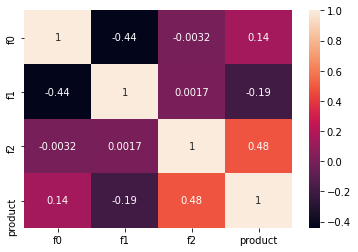

In [ ]:
hmap(geo_data_0)

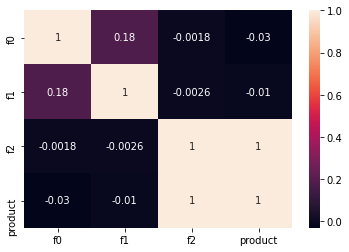

In [ ]:
hmap(geo_data_1)

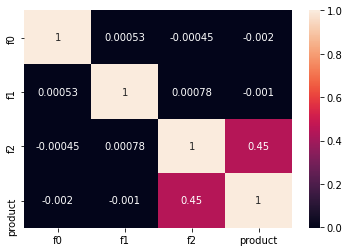

In [ ]:
hmap(geo_data_2)

In [ ]:
geo_data_0 = geo_data_0.drop(['id'], axis = 1)
geo_data_1 = geo_data_1.drop(['id'], axis = 1)
geo_data_2 = geo_data_2.drop(['id'], axis = 1)

In [ ]:
def oil_hist(data,bins,xlim_max, ylim_max):
    plt.figure(figsize = [12,9])
    
    plt.hist(data, bins = bins)
    
    plt.xlim([0,xlim_max])
    plt.ylim([0,ylim_max])
    
    plt.xlabel('объём запасов в скважине (тыс. баррелей)')
    plt.ylabel('количество скважин')
    
    plt.title('Гистограмма распределения  по объему скважин')
    
    plt.show()

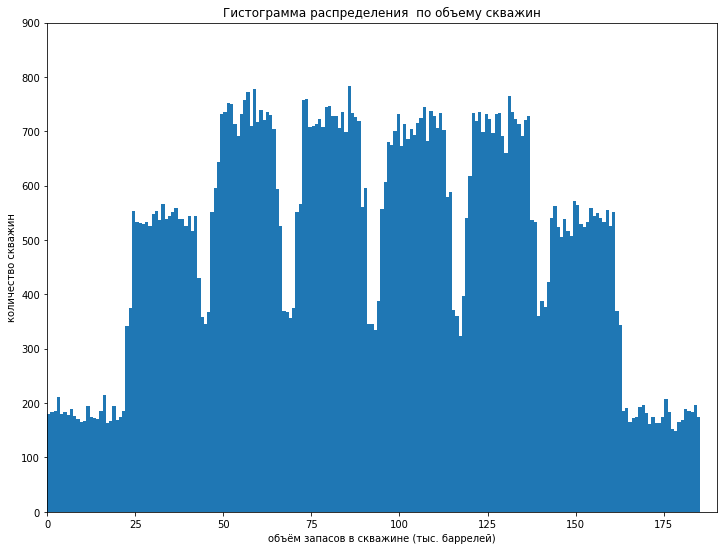

In [ ]:
oil_hist(geo_data_0['product'],200, 190,900)

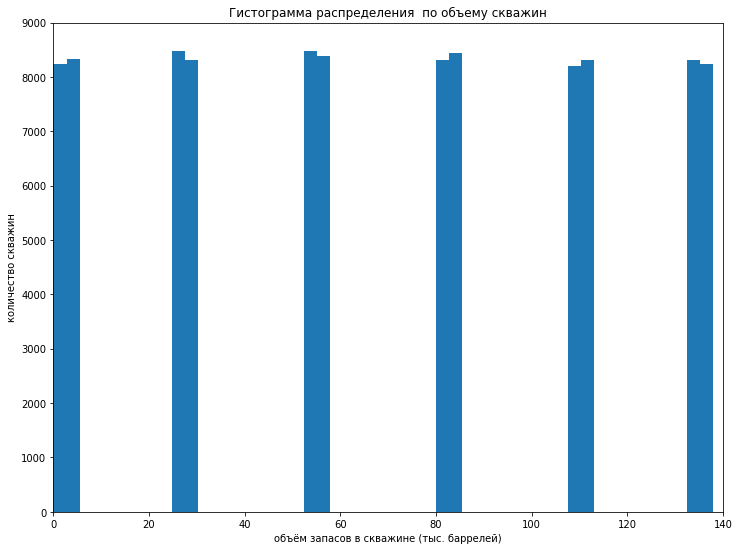

In [ ]:
oil_hist(geo_data_1['product'],50, 140,9000)

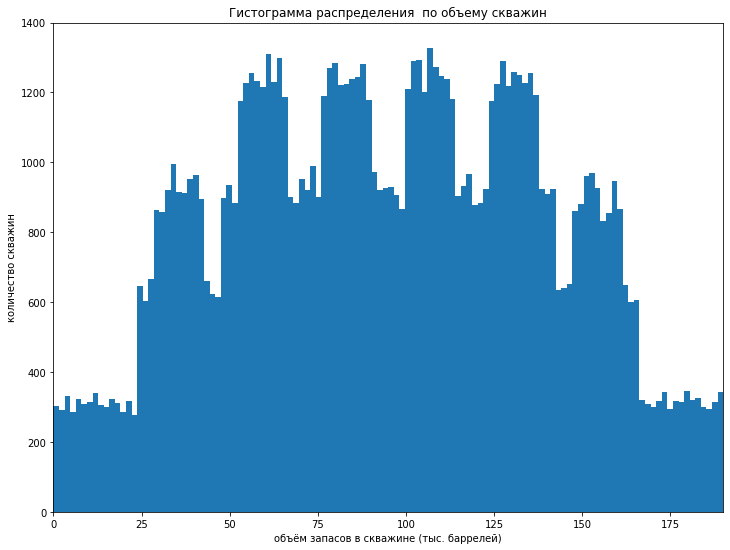

In [ ]:
oil_hist(geo_data_2['product'],120, 190,1400)

In [ ]:
zeros = geo_data_1[geo_data_1['product'] == 0]['product'].count()
percent = zeros / geo_data_1.shape[0]
print('Количество нулевых значений -', zeros)
print('Процент нулевых значений -', percent)
    

Количество нулевых значений - 8235
Процент нулевых значений - 0.08235


In [ ]:
geo_data_1[geo_data_1['product'] == 0]

,f0,f1,f2,product
11,16.320755,-0.562946,-0.001783,0.0
13,6.695604,-0.749449,-0.007630,0.0
62,21.418478,-5.134490,-0.002836,0.0
63,6.822701,3.104979,-0.000723,0.0
77,6.750150,-11.893512,-0.001601,0.0
...,...,...,...,...
99936,5.085749,-3.980305,0.005063,0.0
99948,8.277805,-9.178818,0.003275,0.0
99956,13.343983,-1.290200,0.005980,0.0
99961,13.854163,-11.528089,-0.005556,0.0


<div class="alert alert-info">
<b> Комментарий : </b> 
<br> *  Данные геологоразведки 2 региона, а имеено geo_data_1, выглядят очень странно, это доказывает и гистограмма.Данная гистограмма далека от нормального распределения. Очень много нулевых значений, а имеено 8.2%. Данные либо были утеряны, либо ввыведены искуственно.


    
</div>

<div class="alert alert-info">
<b> Комментарий : </b> 
<br> *  Проверила Корреляцию, что можно увидеть, что в geo_data_1 между столбцами f2 и product существует очень сильная зависимость.  Количество уникальных значений id, которые встречаются в датафрейме тоже отсутствуют, дубликатов тоже нет.Поэтому действительно, можно спокойно удалять столбец id


    
</div>

### Признаки для модели:

* f0;
* f1;
* f2.
### Целевой признак:

* product.

 *Вывод:*

Результаты первичного анализа:

 - Пропуски - отсутствуют
 - Типы столбцов - корректны
 - Названия столбцов - корректны
 - Дубликаты - отсутствуют
 - Коррелирующие признаки - учтены
 - Найден целевой признак для обучения и проверки модели

## Обучение и проверка модели

In [ ]:
def drill(data,column):

    target = data[column]
    features = data.drop([column] , axis=1)

    features_train,features_valid,target_train,target_valid =  train_test_split(features,target, test_size=0.25, random_state=RANDOM_STATE)
    return features_train, features_valid, target_train, target_valid

In [ ]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = drill(geo_data_0, 'product')

features_train_0.head()

,f0,f1,f2
76104,0.271389,-0.317743,1.050558
96018,0.261918,-0.268957,3.887995
220,0.965644,0.755683,3.145287
55455,1.082415,0.097592,2.026243
28548,0.774934,0.589147,2.181892


In [ ]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = drill(geo_data_1, 'product')

features_train_1.head()

,f0,f1,f2
76104,-13.498372,-8.410282,1.005981
96018,11.300167,-12.647812,0.003215
220,-6.410753,-16.398200,3.002505
55455,1.047155,-5.572016,3.001012
28548,1.767578,-4.295641,3.002204


In [ ]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = drill(geo_data_2, 'product')

features_train_2.head()

,f0,f1,f2
76104,-1.279358,-2.143930,0.430187
96018,-0.615558,1.369586,-2.378751
220,-0.686993,1.992999,-1.927723
55455,0.330036,-0.371076,-2.030473
28548,-0.630284,-0.440661,-1.129910


In [ ]:
model = LinearRegression()

def oil_predict(df, target_name):
    
    features_train, features_valid, target_train, target_valid = drill(df, 'product')
    
    model.fit(features_train, target_train)
    predicted_target = model.predict(features_valid)
    predicted_target_Sr = pd.Series(predicted_target, index = target_valid.index)
    data = {'real_product' : target_valid,
            'predicted_product' : predicted_target_Sr         
    }
    data_frame = pd.DataFrame(data, columns = ['real_product', 'predicted_product'])
    rmse = mean_squared_error(target_valid, predicted_target_Sr)**0.5
    mean = data_frame['predicted_product'].mean()
    oil_sum = data_frame['predicted_product'].sum()
    return data_frame, rmse, mean, oil_sum

In [ ]:
geo_data_0_predicted, geo_data_0_rmse, geo_data_0_predicted_mean, geo_data_0_predicted_sum = oil_predict(geo_data_0, 'product')
print(geo_data_0_predicted.head())
print('RMSE -', geo_data_0_rmse)
print('Средний запас запасанного сырья -', geo_data_0_predicted_mean)

       real_product  predicted_product
60272    102.375318          92.203588
90447     48.209353          73.495529
42584     36.238214          50.083488
60773     69.927328         103.372955
67155     57.716082          66.395704
RMSE - 37.458478918291874
Средний запас запасанного сырья - 92.47873235986079


In [ ]:
geo_data_1_predicted, geo_data_1_rmse, geo_data_1_predicted_mean, geo_data_1_predicted_sum = oil_predict(geo_data_1, 'product')
print(geo_data_1_predicted.head())
print('RMSE -', geo_data_1_rmse)
print('Средний запас запасанного сырья -', geo_data_1_predicted_mean)

       real_product  predicted_product
60272    137.945408         139.093234
90447     80.859783          81.099907
42584     84.038886          84.700393
60773     26.953261          28.137619
67155     84.038886          83.375666
RMSE - 0.8863941388242229
Средний запас запасанного сырья - 68.84292971740028


In [ ]:
geo_data_2_predicted, geo_data_2_rmse, geo_data_2_predicted_mean, geo_data_2_predicted_sum = oil_predict(geo_data_2, 'product')
print(geo_data_2_predicted.head())
print('RMSE -', geo_data_2_rmse)
print('Средний запас запасанного сырья -', geo_data_2_predicted_mean)

       real_product  predicted_product
60272     99.171150          86.774363
90447    141.060606          80.915801
42584    132.033756         110.912166
60773     40.007790          74.090783
67155    109.800631          90.744154
RMSE - 40.06449385905336
Средний запас запасанного сырья - 95.24523861299608


<div class="alert alert-info">
<b> Вывод  : </b> 
<br>
    
-  Данные предсказаний о количестве нефти по сумме примерно совпадают по сумме с предсказанными значениями. Лучше всего модель предсказала запасы во втором регионе (RMSE - 0.88), далее в первом и третьем соотвественно.

- Возможно утеряные данные из второго региона сказались на модели и она достаточно сильно переобучилась.

- Но из-за утери данных и малого запаса в среднем на меторождение не имеет смысла рассматривать второе месторождение как прибыльное.

- Изучим все регионы на риски и прибыль, но в конечном итоге будем выбирать между 1 и 3 регионом.
- Средний запас варируется:
    - Средний запас  сырья - 92.47873235986079 (первый регион)
    - Средний запас  сырья - 68.84292971740028 ( второй регион)
    - Средний запас  сырья - 95.24523861299608 (третий регион)
    
    


    
</div>

## Подготовка к расчёту прибыли

Условия задачи:

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

Расчитаем безубыточную разработку сырья на 200 месторождениях. И найдем среднее количество продукта в месторождениях необходимое для этого.

In [ ]:
average_cost_per_point = BUDGET/BEST_POINTS
print('Средние затраты  на лучшую точку - {:.2f}'.format(average_cost_per_point), 'тыс.руб.')

average_reserve_per_point = average_cost_per_point / PRICE_PER_BARREL
print('Средний запас нефти на точку - {:.2f}'.format(average_reserve_per_point), 'тыс. барелей')

average_fee_barrels = BUDGET/ PRICE_PER_BARREL
print('Средний безубыточный сбор нефти на регион  - {:.2f}'.format(average_fee_barrels ), 'тыс. барелей')

Средние затраты  на лучшую точку - 50000.00 тыс.руб.
Средний запас нефти на точку - 111.11 тыс. барелей
Средний безубыточный сбор нефти на регион  - 22222.22 тыс. барелей


<div class="alert alert-info">
<b> Вывод  : </b> 
<br>
    
Полученное знгачение Средний запас нефти на точку выше, чем среднее запасы предсказанные моедлями.
    


    
</div>

## Расчёт прибыли и рисков 

In [ ]:
def profit(target, predictions, count):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected = target[predictions_sorted.index][:count]
    return (selected.sum()*PRICE_PER_BARREL) - BUDGET


def calculate_profit_bootstrap( target,predictions):
    state = np.random.RandomState(12345)    
    values = []

    for i in range(1000):
        target_subsample = target.sample(CHOSEN_POINTS, replace=True, random_state=state)
        pred_subsample = predictions[target_subsample.index]      

        profit_and_volume = profit(target_subsample, pred_subsample,BEST_POINTS)     
        values.append(profit_and_volume)



    values = pd.Series(values)


    lower = values.quantile((1 - CONF_INTERVAL) / 2)
    upper = values.quantile((1 + CONF_INTERVAL) / 2) 
    risk  = (values < 0).sum() / 1000
    average = values.mean()

    return  average, lower, upper, risk 

In [ ]:
average_0, lower_0, upper_0, risk_0 = calculate_profit_bootstrap(geo_data_0_predicted['real_product'], 
                                                     geo_data_0_predicted['predicted_product'])
print('Данные по первому региону.')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_0))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_0, upper_0))
print('Процент риска {:.2%}'.format(risk_0))

Данные по первому региону.
Средняя прибыль по региону = 497019.73 тыс.руб.
95% доверительный интервал от -42849.53 до 1037079.85 тыс.руб.
Процент риска 3.10%


In [ ]:
average_1, lower_1, upper_1, risk_1 = calculate_profit_bootstrap(geo_data_1_predicted['real_product'], 
                                                     geo_data_1_predicted['predicted_product'])
print('Данные по первому региону.')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_1))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_1, upper_1))
print('Процент риска {:.2%}'.format(risk_1))

Данные по первому региону.
Средняя прибыль по региону = 528459.96 тыс.руб.
95% доверительный интервал от 94543.10 до 970699.28 тыс.руб.
Процент риска 0.90%


In [ ]:
average_2, lower_2, upper_2, risk_2 = calculate_profit_bootstrap(geo_data_2_predicted['real_product'], 
                                                     geo_data_2_predicted['predicted_product'])
print('Данные по первому региону.')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_2))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_2, upper_2))
print('Процент риска {:.2%}'.format(risk_2))

Данные по первому региону.
Средняя прибыль по региону = 381437.47 тыс.руб.
95% доверительный интервал от -212591.15 до 912443.14 тыс.руб.
Процент риска 8.70%


 *Вывод*
 - Нулевой регион:
   - Доверительный интервал: от -42849.53 до 1037079.85 тыс.руб.
   - Точка безубыточности: 111.(1)
   - Средняя прибыль в нулевом регионе:497019.73 тыс.руб.
   - Риски:3.10%
 - Первый регион:
   - Доверительный интервал: от 94543.10 до 970699.28 тыс.руб.
   - Точка безубыточности: 111.(1)
   - Средняя прибыль в первом регионе:528459.96 тыс.руб.
   - Риски: 0.90%
 - Второй регион:
   - Доверительный интервал: от -212591.15 до 912443.14 тыс.руб.
   - Точка безубыточности: 111.(1)
   - Средняя прибыль с одной скважины во втором регионе: 381437.47 тыс.руб.
   - Риски:  8.70%
   
   
По условию рисков наиболее подходящим будет первый регион. также можно заметить, что средняя прибыль с одной скважины в первом  регионе: 528459.96 тыс.руб.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован